In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

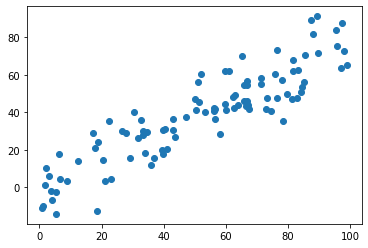

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [9]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [10]:
X_demean = demean(X)

In [12]:
# 梯度上升

In [74]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w) ** 2) / len(X)

def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)  # 注意1：初始向量不能使用0向量
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意2：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w


In [44]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = gradient_ascent(df_debug, X_demean, initial_w, eta)
w

array([0.43869371, 0.44474792])

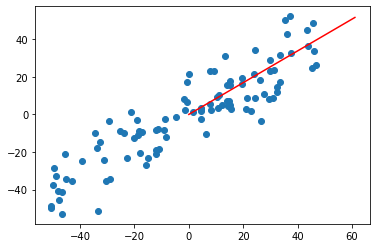

In [53]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*80], [0, w[1]*80], color="r")
plt.show()

In [57]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [62]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

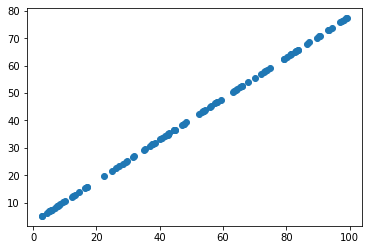

In [63]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [68]:
X2_demean = demean(X2)

In [70]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
w2

array([-0.80000049, -0.59999935])

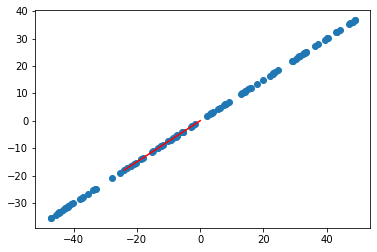

In [71]:
plt.scatter(X2_demean[:,0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0,w2[1]*30], color='r')
plt.show()